In [2]:
#Import required libraries

import pandas as pd
import seaborn as sns
import re

In [ ]:
df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')

In [ ]:
#See the data that has been imported
df.head(10)

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
#Data cleaning Phase

In [27]:
#Only want USA Races, 50k or 50mi, year 2020
#Step 1: show 50mi or 50k
#50km
#50mi

df[df['Event distance/length'] == '50mi']

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37 h,NaN,USA,1941.0,M,M50,6709.0,1045603
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41 h,NaN,USA,1932.0,M,M60,6690.0,1070463
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1934.0,F,W60,6674.0,416139
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1951.0,F,W40,6674.0,1098098


In [ ]:
#Combine 50k/50mi with isin
df[df['Event distance/length'].isin(['50mi','50km'])]

In [6]:
df[(df['Event distance/length'].isin(['50mi','50km'])) & (df['Year of event'] == 2020)]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2538571,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:34:19 h,日本隊,JPN,1965.0,M,M50,10.627,53107
2538572,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:43:50 h,NaN,AUS,1974.0,M,M45,10.409,8785
2538573,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:04:40 h,NaN,TPE,1976.0,M,M40,9.962,4502
2538574,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:30:49 h,台灣大腳ㄚ長跑協會,TPE,1969.0,F,W50,9.452,63964
2538575,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:34:47 h,NaN,TPE,1964.0,M,M55,9.379,4485
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762404,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:36:25 h,AKS Polonia Warszawa,POL,1981.0,F,W35,6.573,860743
2762405,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:36:27 h,*Warszawa,POL,1970.0,F,W45,6.572,860744
2762406,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:44:18 h,Outdoor Training,POL,1993.0,F,W23,6.461,860745
2762407,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,8:04:50 h,PH Bysewo Gdańsk,POL,1976.0,M,M40,6.188,798409


In [ ]:
'''df[df['Event name'] == 'Everglades 50 Mile Ultra Run (USA)']['Event name'].str.split('(').str.get(1).str.split(')').str.get(0)'''

In [7]:
#Find all the events that took place in the USA
df[df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA']

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37 h,NaN,USA,1941.0,M,M50,6709.0,1045603
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41 h,NaN,USA,1932.0,M,M60,6690.0,1070463
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1934.0,F,W60,6674.0,416139
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1951.0,F,W40,6674.0,1098098


In [19]:
'''countries_df = df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0)'''

In [8]:
#Combine all the filters together for the USA
USA_df = df[(df['Event distance/length'].isin(['50mi','50km'])) & (df['Year of event'] == 2020) & (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA')]

In [9]:
USA_df

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760957,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:07:48 h,"*East Lansing, MI",USA,1958.0,F,W60,7.013,816361
2760958,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:27:22 h,"*Traverse City, MI",USA,1977.0,F,W40,6.706,326469
2760959,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:27:24 h,"*Traverse City, MI",USA,1962.0,F,W55,6.705,372174
2760960,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:38:30 h,"*Mason, MI",USA,1981.0,F,W35,6.543,860349


In [ ]:
#Remove USA from event name
USA_df['Event name'] = USA_df['Event name'].str.split('(').str.get(0)

In [11]:
USA_df

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760957,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48 h,"*East Lansing, MI",USA,1958.0,F,W60,7.013,816361
2760958,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22 h,"*Traverse City, MI",USA,1977.0,F,W40,6.706,326469
2760959,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24 h,"*Traverse City, MI",USA,1962.0,F,W55,6.705,372174
2760960,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30 h,"*Mason, MI",USA,1981.0,F,W35,6.543,860349


In [ ]:
#Clean up athlete age and give it a proper format (i.e 23)

In [ ]:
#Firstly, we should change float datatype to int to be able to do the calculations.
#As there are some null values in [athlete year of birth] column, we cannot change the datatype from float to integer. So, follow these steps:
USA_df['Athlete year of birth'] = USA_df['Athlete year of birth'].fillna(0)

In [ ]:
#In this step we can change the datatype using astype and save it to the current col.
USA_df['Athlete year of birth'] = USA_df['Athlete year of birth'].astype(int)

In [ ]:
#Now we can do the age calculations:
USA_df['Athlete age category'] = USA_df['Year of event'] - USA_df['Athlete year of birth'].astype(int)

In [15]:
#Finally, we rename Athlete age category col.
USA_df = USA_df.rename(columns={'Athlete age category':'Athlete age'})

In [ ]:
#Remove "h" from athlete performance

In [16]:
#Change the datatype to str
USA_df['Athlete performance'] = USA_df['Athlete performance'].str.split(' ').str.get(0)

In [17]:
#Drop redundant cols: Athlete club, Athlete year of birth
USA_df = USA_df.drop(['Athlete club', 'Athlete year of birth'], axis=1)

In [18]:
#Check and delete null values
#USA_df.isna()
USA_df = USA_df.dropna()

In [19]:
#Check for duplicate values
USA_df[USA_df.duplicated() == True]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete age,Athlete average speed,Athlete ID


In [20]:
#Reset index
USA_df.reset_index(drop=True)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete age,Athlete average speed,Athlete ID
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,USA,M,29,15.158,71287
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,USA,M,39,12.369,629508
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,USA,M,21,12.099,64838
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,USA,M,37,11.449,704450
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,USA,M,43,11.212,810281
...,...,...,...,...,...,...,...,...,...,...,...
26085,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48,USA,F,62,7.013,816361
26086,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22,USA,F,43,6.706,326469
26087,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24,USA,F,58,6.705,372174
26088,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30,USA,F,39,6.543,860349


In [21]:
#Modify datatypes
USA_df['Athlete average speed'] = USA_df['Athlete average speed'].astype(float)

In [22]:
#Rename cols for USA dataset
USA_df = USA_df.rename(columns={'Year of event':'year',
                                'Event dates':'race_day',
                                'Event name':'race_name',
                               'Event distance/length':'race_length',
                               'Event number of finishers':'number_of_finishers',
                               'Athlete performance':'athlete_performance',
                               'Athlete country':'athlete_country',
                               'Athlete gender':'athlete_gender',
                               'Athlete age':'athlete_age',
                               'Athlete average speed':'athlete_average_speed',
                               'Athlete ID':'athlete_id'})

In [23]:
USA_df.head()

,year,race_day,race_name,race_length,number_of_finishers,athlete_performance,athlete_country,athlete_gender,athlete_age,athlete_average_speed,athlete_id
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,USA,M,29,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,USA,M,39,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,USA,M,21,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,USA,M,37,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,USA,M,43,11.212,810281


In [24]:
#Reorder cols:
USA_df = USA_df[['athlete_id', 'athlete_gender', 'athlete_age', 'athlete_country',
                 'athlete_performance', 'athlete_average_speed', 'number_of_finishers', 'race_length',
                 'race_name', 'race_day', 'year']]

In [29]:
USA_df.head(20)

,athlete_id,athlete_gender,athlete_age,athlete_country,athlete_performance,athlete_average_speed,number_of_finishers,race_length,race_name,race_day,year
2539945,71287,M,29,USA,3:17:55,15.158,20,50km,West Seattle Beach Run - Winter Edition,02.02.2020,2020
2539946,629508,M,39,USA,4:02:32,12.369,20,50km,West Seattle Beach Run - Winter Edition,02.02.2020,2020
2539947,64838,M,21,USA,4:07:57,12.099,20,50km,West Seattle Beach Run - Winter Edition,02.02.2020,2020
2539948,704450,M,37,USA,4:22:02,11.449,20,50km,West Seattle Beach Run - Winter Edition,02.02.2020,2020
2539949,810281,M,43,USA,4:27:34,11.212,20,50km,West Seattle Beach Run - Winter Edition,02.02.2020,2020
2539950,810282,F,35,USA,4:42:06,10.635,20,50km,West Seattle Beach Run - Winter Edition,02.02.2020,2020
2539951,11739,M,59,USA,4:49:20,10.369,20,50km,West Seattle Beach Run - Winter Edition,02.02.2020,2020
2539952,80394,M,50,USA,4:49:50,10.351,20,50km,West Seattle Beach Run - Winter Edition,02.02.2020,2020
2539953,140909,F,45,USA,4:51:00,10.309,20,50km,West Seattle Beach Run - Winter Edition,02.02.2020,2020
2539954,753889,M,41,USA,5:02:35,9.915,20,50km,West Seattle Beach Run - Winter Edition,02.02.2020,2020


In [26]:
#Data Exploration Phase for USA data frame - 2020 Marathon 50mi or 50km:

In [34]:
#Q1 >> Find top 10 atheletes with highest average speed in 2020 in the USA.
USA_df.sort_values('athlete_average_speed', ascending=False).head(10)

,athlete_id,athlete_gender,athlete_age,athlete_country,athlete_performance,athlete_average_speed,number_of_finishers,race_length,race_name,race_day,year
2628377,117534,M,30,USA,2:49:03,17.746,67,50km,Pemberton Trail 50 km,08.02.2020,2020
2604238,39348,M,23,USA,2:57:51,16.868,46,50km,Caumsett Park 50K Lloyd Neck - Championships,01.03.2020,2020
2604239,823386,M,37,USA,2:59:35,16.705,46,50km,Caumsett Park 50K Lloyd Neck - Championships,01.03.2020,2020
2604240,52106,M,46,USA,3:06:10,16.115,46,50km,Caumsett Park 50K Lloyd Neck - Championships,01.03.2020,2020
2632323,829754,M,27,USA,3:08:00,15.957,53,50km,The New Orleans 50 km Ultramarathon,03.10.2020,2020
2721803,532444,M,26,USA,5:03:05,15.930,51,50mi,Tunnel Hill 50 Mile Race,14.-15.11.2020,2020
2604241,119569,M,42,USA,3:10:05,15.783,46,50km,Caumsett Park 50K Lloyd Neck - Championships,01.03.2020,2020
2604242,133149,M,32,USA,3:11:11,15.692,46,50km,Caumsett Park 50K Lloyd Neck - Championships,01.03.2020,2020
2604243,380542,M,36,USA,3:13:19,15.519,46,50km,Caumsett Park 50K Lloyd Neck - Championships,01.03.2020,2020
2604244,29371,M,46,USA,3:14:56,15.390,46,50km,Caumsett Park 50K Lloyd Neck - Championships,01.03.2020,2020


In [57]:
#Q2 >> How many male and female participants were there in the 2020 marathon in the USA? provide the numbers separately?
USA_df['athlete_gender'].value_counts()

athlete_gender
M    17689
F     8401
Name: count, dtype: int64

In [60]:
#Q3 >> What percent of participants were male / female?
#The result of the code below is a fraction in range (0, 1]. We multiply by 100 here in order to get the %.
USA_df['athlete_gender'].value_counts(normalize=True) * 100

athlete_gender
M    67.799923
F    32.200077
Name: proportion, dtype: float64

In [71]:
#I suddenly recognized that I have 233 wrong data in age col. these rows were 0 at first and in my age calculations they turned to 2020. so I deleted them with the code below. 
USA_df = USA_df[USA_df.athlete_age != 2020]

In [73]:
#Q4 >> What was the average age of the participants?
USA_df.athlete_age.mean()

41.88359051707468

In [109]:
#Q5  >> Calculate the average age for each gender.
#Because of the gender col dtype (object), I can't easily calculate the age usin group by. So, at first I have to create two new dataframes (one for males and one for females), and then I can calculate the mean age for each group.
male_df = USA_df[USA_df['athlete_gender'] == 'M']

In [115]:
male_df.athlete_age.mean()

41.93858447488584

In [116]:
female_df = USA_df[USA_df['athlete_gender'] == 'F']

In [118]:
female_df.athlete_age.mean()

41.76802207028907

In [161]:
#Q6 >> How many unique event are there in the USA dataframe?
USA_df['race_name'].value_counts().reset_index()

,race_name,count
0,JFK 50 Mile,632
1,Way Too Cool 50K Endurance Run,572
2,Mountain Mist 50k,357
3,Salmon Falls 50 km Race,310
4,Avalon Benefit 50 Km Run,293
...,...,...
484,Dark and Dirty Gravel Miles,3
485,Wildcat Ridge Romp 50 Mile,3
486,Folsom South Side Trail Run 50 Km,2
487,Triple D Winter 50 km Race,2


In [199]:
#Q7 >> Identify top 20 (unique) events with highest number of finishers.
uniq_event_and_finisher = USA_df[['race_name', 'number_of_finishers']].value_counts()

In [201]:
uniq_event_and_finisher = uniq_event_and_finisher.sort_values(ascending=False).head(20).reset_index()

In [203]:
uniq_event_and_finisher.drop('count', axis=1)

,race_name,number_of_finishers
0,JFK 50 Mile,636
1,Way Too Cool 50K Endurance Run,572
2,Mountain Mist 50k,357
3,Salmon Falls 50 km Race,310
4,Avalon Benefit 50 Km Run,293
5,The Cowtown Marathon,276
6,Antelope Canyon 50 Mile,266
7,Dead Horse 50 km Race,253
8,Squaw Peak 50 Mile Trail Run,248
9,Algonquin 50km Trail Race,236


In [218]:
#Q8 >> How many times has each athlete participated in these marathons?
USA_df.value_counts('athlete_id').reset_index()

,athlete_id,count
0,34844,14
1,24307,13
2,343803,13
3,1190,11
4,141,11
5,143,9
6,84429,9
7,709026,8
8,366584,8
9,19275,8


In [225]:
#Q9 >> Which countries had the highest number of participants in  these marathons? Select top 10.
USA_df.value_counts('athlete_country').reset_index().head(10)

,athlete_country,count
0,USA,25516
1,CAN,105
2,JPN,23
3,GER,23
4,GBR,18
5,FRA,17
6,ITA,16
7,PHI,11
8,MEX,10
9,AUS,10


In [ ]:
#Charts and plots

C:\Users\Maedeh\AppData\Local\Temp\ipykernel_10208\3333857024.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  q_9_plot = sns.countplot(x='athlete_country',data=USA_df,order=pd.value_counts(USA_df['athlete_country']).iloc[:10].index)


[Text(0, 0, '25516'),
 Text(0, 0, '105'),
 Text(0, 0, '23'),
 Text(0, 0, '23'),
 Text(0, 0, '18'),
 Text(0, 0, '17'),
 Text(0, 0, '16'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '10')]

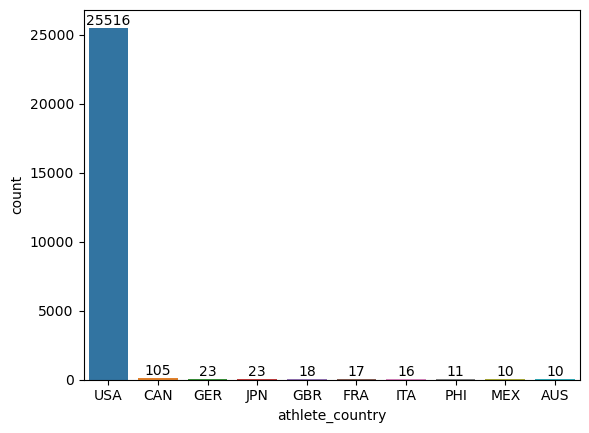

In [232]:
#Create a histogram for question 9
q_9_plot = sns.countplot(x='athlete_country',data=USA_df,order=pd.value_counts(USA_df['athlete_country']).iloc[:10].index)
q_9_plot.bar_label(q_9_plot.containers[0])